In [1]:
# Pull common library
%cd
!git clone https://github.com/ashxjain/ERA-V2.git
%cd ERA-V2
!git pull origin main
%cd common

/root
fatal: destination path 'ERA-V2' already exists and is not an empty directory.
/root/ERA-V2
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), 334 bytes | 167.00 KiB/s, done.
From https://github.com/ashxjain/ERA-V2
 * branch            main       -> FETCH_HEAD
   4f1e1a2..8dc707c  main       -> origin/main
Updating 4f1e1a2..8dc707c
Fast-forward
 common/utils.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)
/root/ERA-V2/common


In [2]:
# Install dependencies
!pip install grad-cam

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.backends.cudnn as cudnn
from torchsummary import summary

from main import *
from models import *
from utils import *

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Data
train_loader, test_loader, classes = load_transformed_dataset(DatasetName.CIFAR10, 128)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
# Model
model = ResNet18()
model = model.to(device)

# Displaying model summary
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [6]:
# Training and testing the model
train_acc, train_losses, test_acc, test_losses = train_test_model(model, device, train_loader, test_loader, num_epochs=20, lr=0.1, run_scheduler=True)

Epoch 1


  0%|          | 0/391 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Train: Loss=1.7835 Batch_id=390 Accuracy=27.02: 100%|██████████| 391/391 [00:50<00:00,  7.76it/s]


Test set: Average loss: 0.0134, Accuracy: 3844/10000 (38.44%)



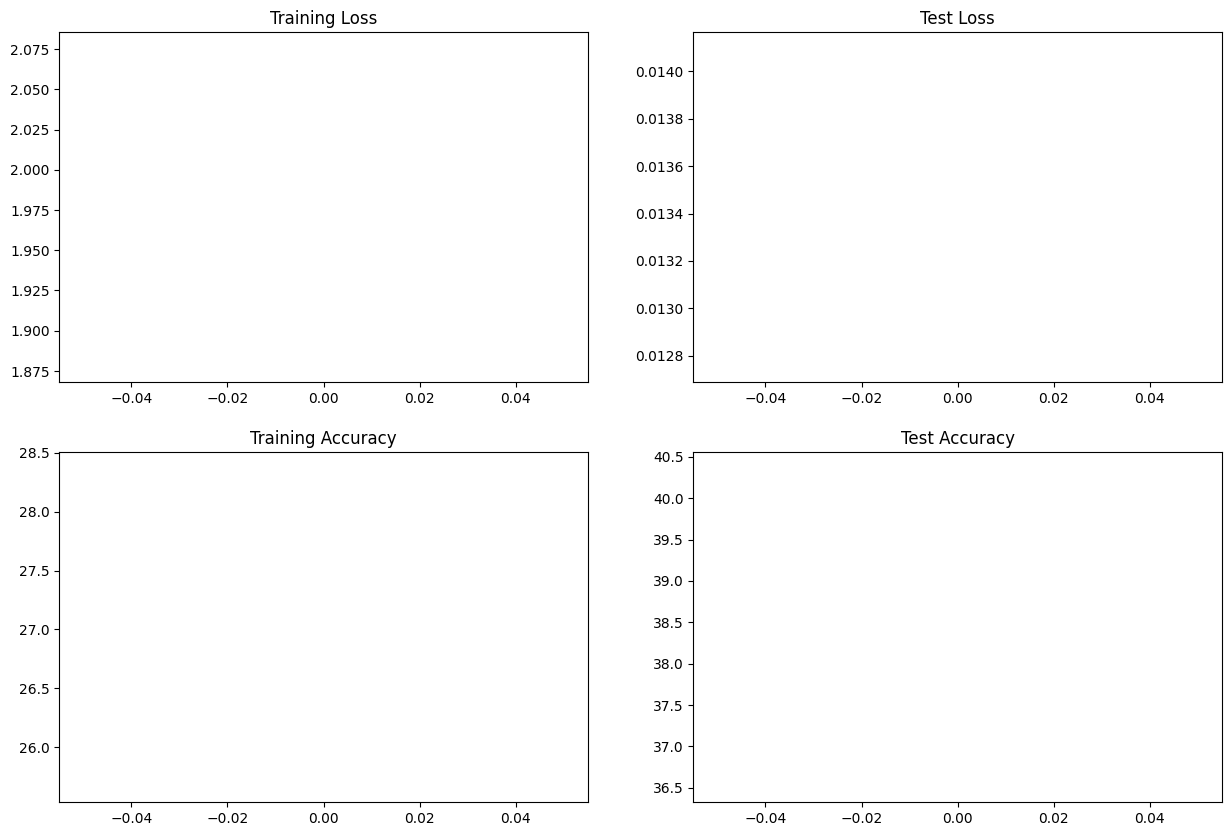

In [7]:
# Plotting training metrics
plot_train_metrics(train_losses, train_acc, test_losses, test_acc)

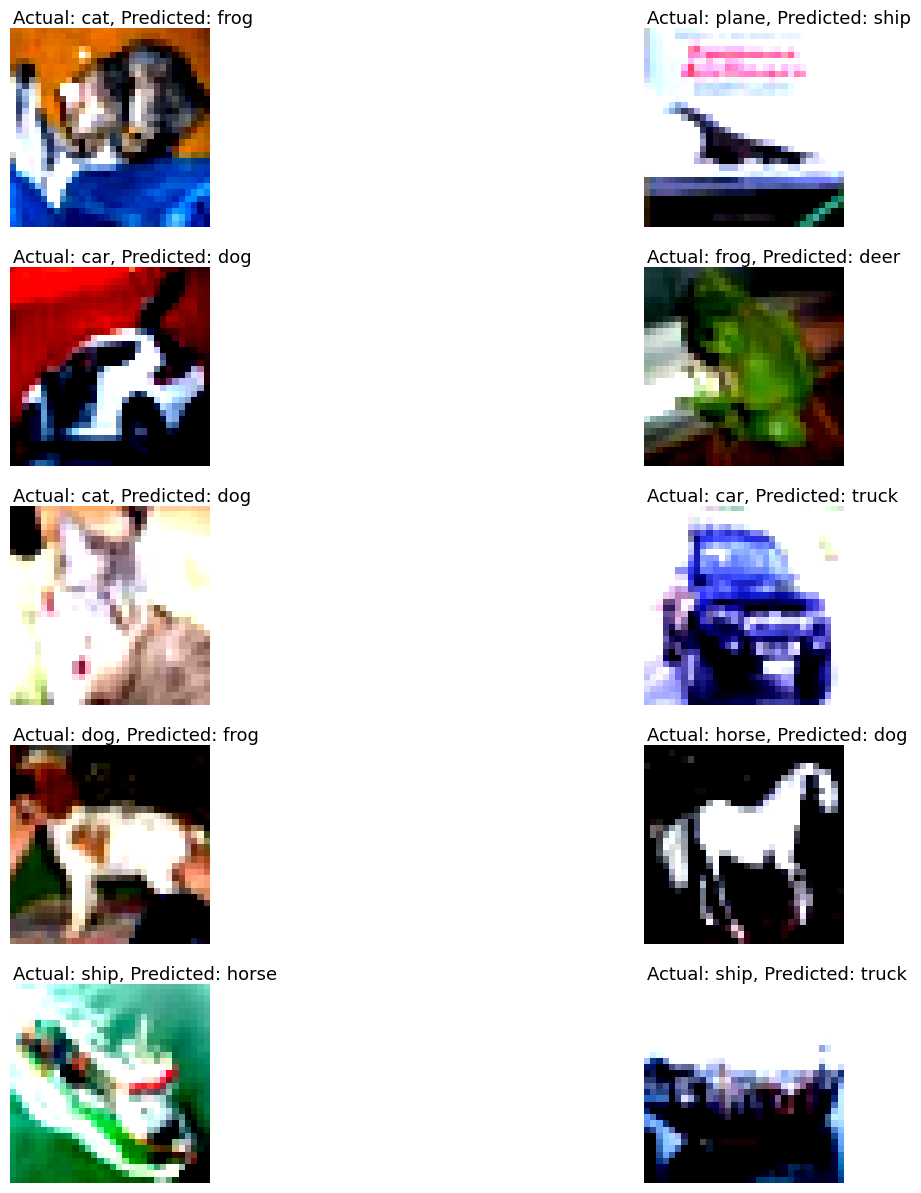

In [8]:
# Show a gallery of 10 misclassified images
show_misclassified_images_from_model(model, device, test_loader, classes, image_count=10)

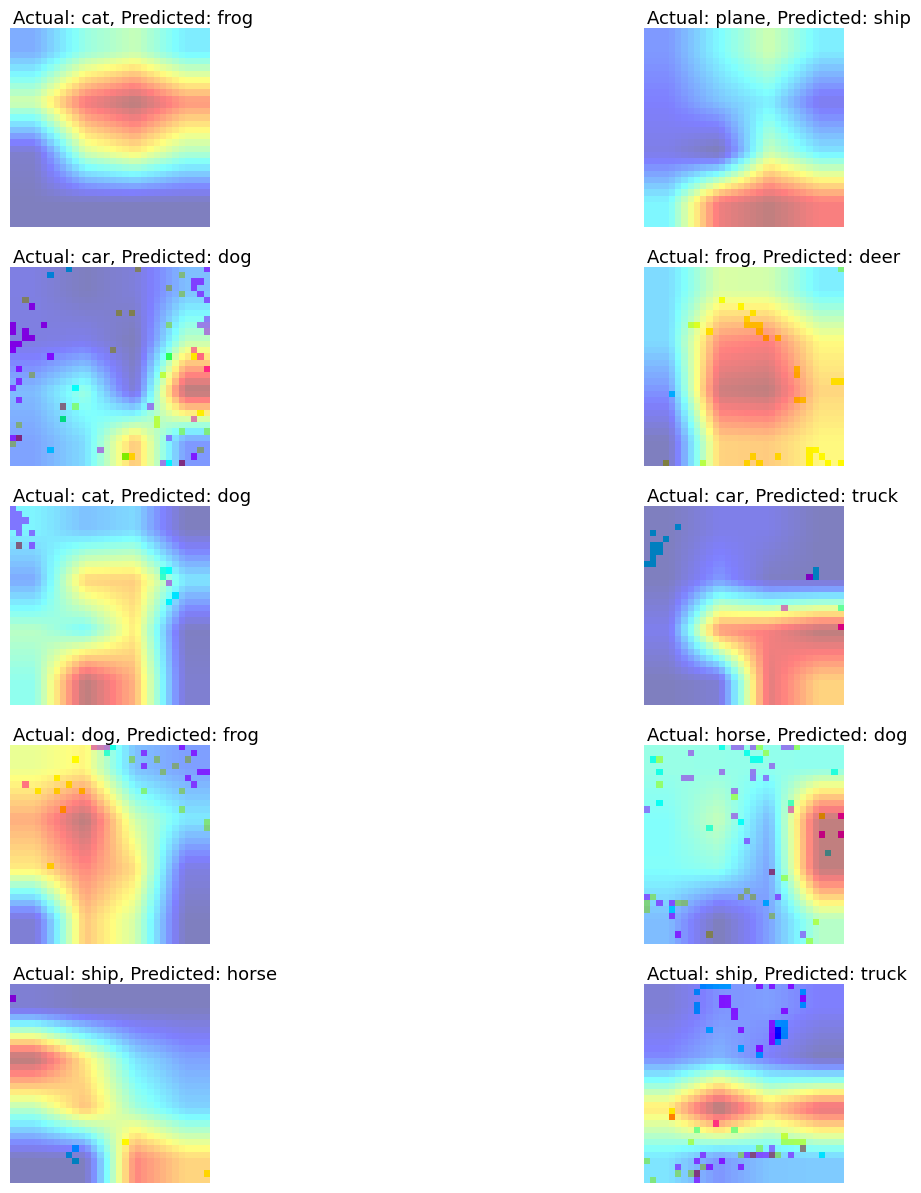

In [9]:
show_gradcam_on_misclassified_images_from_model(model, device, model.layer4[-1], test_loader, classes, image_count=10)